# notebook to calculate the noise ceiling for a subject from the pilots

In [1]:
import numpy as np
from sklearn.metrics import r2_score
import pilot
import nat_asd_utils
import matplotlib.pyplot as plt
import itertools
from scipy.stats import zscore

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [2]:
with open('good_pilots_ru_dm_list.txt', 'r') as file:
    sub_list = file.readlines()
good_subjects_list = [line.strip() for line in sub_list]

good_subjects_list

['NDARHJ830RXD',
 'NDARVB897AH1',
 'NDARFA402LMW',
 'NDARUX340FYC',
 'NDARJG687YYX',
 'NDARVD194JX2',
 'NDARVR601FUT',
 'NDARUL694GYN']

## compare one subject to another subject and look at the r2 distribution

In [3]:
Y_sub='NDARHJ830RXD'

X_sub='NDARVB897AH1'



parcels=pilot.select_parcels('a4a5') # load parcel set
atlas_indices_indices=pilot.extract_parcels(parcels) # get indices of parcels
Y=pilot.load_sub_brain(Y_sub,0,atlas_indices_indices)
X=pilot.load_sub_brain(X_sub,0,atlas_indices_indices)
Y= Y[:X.shape[0],:]
X= X[:Y.shape[0],:]
print(X.shape,Y.shape,r2_score(Y, X))

loaded parcels ['A4', 'A5']
loaded brain data
loaded brain data
(746, 728) (746, 728) -1.124192353974565


(array([  1.,   0.,   0.,   3.,   0.,   0.,   0.,   3.,   1.,   0.,   0.,
          0.,   0.,   0.,   1.,   2.,   2.,   1.,   1.,   2.,   3.,   1.,
          3.,   4.,   2.,   5.,   3.,   3.,   7.,   6.,  12.,  13.,   2.,
         13.,  11.,  13.,  17.,  12.,  18.,  15.,  21.,  26.,  31.,  38.,
         41.,  68.,  76.,  87., 101.,  59.]),
 array([-8.62466857, -8.44816019, -8.27165181, -8.09514343, -7.91863505,
        -7.74212667, -7.5656183 , -7.38910992, -7.21260154, -7.03609316,
        -6.85958478, -6.6830764 , -6.50656802, -6.33005964, -6.15355126,
        -5.97704289, -5.80053451, -5.62402613, -5.44751775, -5.27100937,
        -5.09450099, -4.91799261, -4.74148423, -4.56497585, -4.38846748,
        -4.2119591 , -4.03545072, -3.85894234, -3.68243396, -3.50592558,
        -3.3294172 , -3.15290882, -2.97640044, -2.79989206, -2.62338369,
        -2.44687531, -2.27036693, -2.09385855, -1.91735017, -1.74084179,
        -1.56433341, -1.38782503, -1.21131665, -1.03480828, -0.8582999 ,
 

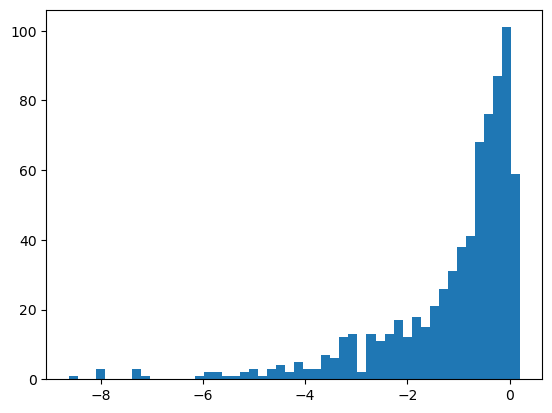

In [4]:
plt.hist(r2_score(Y, X, multioutput='raw_values'),50)

## compare one subject to each other subject and print their R^2

In [5]:
Y_sub='NDARHJ830RXD'

for x in good_subjects_list:
    X_sub=x
    
    parcels=pilot.select_parcels('a4a5') # load parcel set
    atlas_indices_indices=pilot.extract_parcels(parcels) # get indices of parcels
    Y=pilot.load_sub_brain(Y_sub,0,atlas_indices_indices)
    X=pilot.load_sub_brain(X_sub,0,atlas_indices_indices)
    Y= Y[:X.shape[0],:]
    X= X[:Y.shape[0],:]
    Y=zscore(Y)
    X=zscore(X)
    print(X.shape,Y.shape,r2_score(Y, X))

loaded parcels ['A4', 'A5']
loaded brain data
loaded brain data
(746, 728) (746, 728) 1.0
loaded parcels ['A4', 'A5']
loaded brain data
loaded brain data
(746, 728) (746, 728) -0.5383128871258391
loaded parcels ['A4', 'A5']
loaded brain data
loaded brain data
(746, 728) (746, 728) -0.6605453171634378
loaded parcels ['A4', 'A5']
loaded brain data
loaded brain data
(746, 728) (746, 728) -0.6181416297315782
loaded parcels ['A4', 'A5']
loaded brain data
loaded brain data
(746, 728) (746, 728) -0.6621568271906778
loaded parcels ['A4', 'A5']
loaded brain data
loaded brain data
(746, 728) (746, 728) -0.6088487934862241
loaded parcels ['A4', 'A5']
loaded brain data
loaded brain data
(746, 728) (746, 728) -0.4474220567705152
loaded parcels ['A4', 'A5']
loaded brain data
loaded brain data
(746, 728) (746, 728) -0.5855915194712296


so for all subjects the r2 are negative... hmm continue for the other subjects

## compare each subject to the means of the other subjects

In [6]:
#get a list of all of the subject data

brain_data_list=[]
for x in good_subjects_list:
    X_sub=x
    
    parcels=pilot.select_parcels('a4a5') # load parcel set
    atlas_indices_indices=pilot.extract_parcels(parcels) # get indices of parcels
    #Y=pilot.load_sub_brain(Y_sub,0,atlas_indices_indices)
    X=pilot.load_sub_brain(X_sub,0,atlas_indices_indices)
    #Y= Y[:X.shape[0],:]
    #X= X[:Y.shape[0],:]
    brain_data_list.append(X)
    #print(X.shape,Y.shape,r2_score(Y, X))
min_len=min([b.shape[0] for b in brain_data_list])
brain_data_list=[b[:min_len,:] for b in brain_data_list]
brain_data_list=[zscore(b) for b in brain_data_list]

loaded parcels ['A4', 'A5']
loaded brain data
loaded parcels ['A4', 'A5']
loaded brain data
loaded parcels ['A4', 'A5']
loaded brain data
loaded parcels ['A4', 'A5']
loaded brain data
loaded parcels ['A4', 'A5']
loaded brain data
loaded parcels ['A4', 'A5']
loaded brain data
loaded parcels ['A4', 'A5']
loaded brain data
loaded parcels ['A4', 'A5']
loaded brain data


In [7]:
for i,b in enumerate(brain_data_list):
    brain_data_list_rem = brain_data_list[:i] + brain_data_list[i + 1:]
    print(r2_score(b, np.mean(brain_data_list_rem,axis=0) ) )

0.07229869213227859
0.19174225756603375
0.08066176808074985
0.14054942854279867
0.05237060585540822
0.06110912348041941
0.20437931584121707
0.09308665960351627


some are ok but some are a bit low......

## compare each subject to every combination of other subjects as in the literature... but too large for my huge dataset??

In [8]:
# Get all combinations of all lengths
def get_combinations(input_list):
    all_combinations = []
    for r in range(1, len(input_list) + 1):
        combinations_r = itertools.combinations(input_list, r)
        all_combinations.extend(combinations_r)
    # Convert to a list of lists for better readability
    all_combinations = [list(comb) for comb in all_combinations]
    #print(len(all_combinations), 'combinations')
    return(all_combinations)

In [9]:
for i,b in enumerate(brain_data_list):
    brain_data_list_rem = brain_data_list[:i] + brain_data_list[i + 1:]
    all_combinations=get_combinations(brain_data_list_rem)
    r2_list=[]
    for a in all_combinations:
        r2_list.append(r2_score(b, np.mean(a,axis=0) ))
    print(max(r2_list))

0.07229869213227859
0.19174225756603375
0.08066176808074985
0.14054942854279867
0.05237060585540822
0.06110912348041941
0.20437931584121707
0.09308665960351627


this is roughly the same as the mean. so the mean is just about as good...

## load all of the pilots

In [10]:
with open('pilots_ru_dm_list.txt', 'r') as file:
    sub_list = file.readlines()
good_subjects_list = [line.strip() for line in sub_list]

In [11]:
#get a list of all of the subject data

brain_data_list=[]
for x in good_subjects_list:
    X_sub=x
    
    parcels=pilot.select_parcels('a4a5') # load parcel set
    atlas_indices_indices=pilot.extract_parcels(parcels) # get indices of parcels
    #Y=pilot.load_sub_brain(Y_sub,0,atlas_indices_indices)
    X=pilot.load_sub_brain(X_sub,0,atlas_indices_indices)
    #Y= Y[:X.shape[0],:]
    #X= X[:Y.shape[0],:]
    brain_data_list.append(X)
    #print(X.shape,Y.shape,r2_score(Y, X))
min_len=min([b.shape[0] for b in brain_data_list])
brain_data_list=[b[:min_len,:] for b in brain_data_list]
brain_data_list=[zscore(b) for b in brain_data_list]

loaded parcels ['A4', 'A5']
loaded brain data
loaded parcels ['A4', 'A5']
loaded brain data
loaded parcels ['A4', 'A5']
loaded brain data
loaded parcels ['A4', 'A5']
loaded brain data
loaded parcels ['A4', 'A5']
loaded brain data
loaded parcels ['A4', 'A5']
loaded brain data
loaded parcels ['A4', 'A5']
loaded brain data
loaded parcels ['A4', 'A5']
loaded brain data
loaded parcels ['A4', 'A5']
loaded brain data
loaded parcels ['A4', 'A5']
loaded brain data
loaded parcels ['A4', 'A5']
loaded brain data
loaded parcels ['A4', 'A5']
loaded brain data
loaded parcels ['A4', 'A5']
loaded brain data
loaded parcels ['A4', 'A5']
loaded brain data
loaded parcels ['A4', 'A5']
loaded brain data
loaded parcels ['A4', 'A5']
loaded brain data
loaded parcels ['A4', 'A5']
loaded brain data
loaded parcels ['A4', 'A5']
loaded brain data
loaded parcels ['A4', 'A5']
loaded brain data
loaded parcels ['A4', 'A5']
loaded brain data
loaded parcels ['A4', 'A5']
loaded brain data
loaded parcels ['A4', 'A5']
loaded

## get the mean of all others to the withheld

In [12]:
for i,b in enumerate(brain_data_list):
    brain_data_list_rem = brain_data_list[:i] + brain_data_list[i + 1:]
    print(r2_score(b, np.mean(brain_data_list_rem,axis=0) ) )

0.12658046210297774
0.05123117523843122
0.0078045269991691875
0.12931198710427796
0.16644742645646526
-0.08095453974708126
-0.025088722546299118
0.17742440875689508
-0.0116868039654732
0.06345523536738108
-0.04940796347937941
0.12594353279437048
0.11908407714314907
-0.08964204123038573
0.15747861015303305
-0.11831733776935038
0.10672798643852839
0.11773492157563632
0.06551801257800755
-0.0448435979423053
0.026527317591144947
0.038366458647542914
-0.10577143882391492
0.10960457461812242
0.2048050911966211
0.11721071752151808


 don't run combinations because it is 33 million combinations :]

## compare each subject to each other looping through list

In [13]:
for i,b in enumerate(brain_data_list):
    r2_list=[]
    brain_data_list_rem = brain_data_list[:i] + brain_data_list[i + 1:]
    for a in brain_data_list_rem:
        
        r2_list.append(r2_score(b, a ) )
    print(np.mean(r2_list),max(r2_list))


-0.7501244049017566 -0.5471533216531052
-0.8225756422715128 -0.6701276105820779
-0.8643320348092648 -0.7227990744781615
-0.7474979385543523 -0.5509763123325
-0.7117907853310954 -0.43382791925331754
-0.9496772912960441 -0.8372436961424505
-0.895960159372215 -0.808028502951978
-0.7012359946576052 -0.3007443515833901
-0.8830736991983439 -0.7494824350856452
-0.8108217383013688 -0.6230083170598758
-0.9193440448847922 -0.8061318379801649
-0.7507368369292636 -0.534214769279781
-0.7573324673631302 -0.4993451255967904
-0.9580306581069138 -0.8494353522021368
-0.7204146471613186 -0.4100207468127243
-0.985603058625149 -0.8713472137616243
-0.7692133238098809 -0.5745410589548721
-0.7586297323318925 -0.5824910228844479
-0.8088382986757662 -0.6527658605400821
-0.9149552318683749 -0.6973481848640032
-0.8463293515477496 -0.6914015640489211
-0.8349455620704438 -0.6072805529656916
-0.973539694254538 -0.6973481848640032
-0.7664473736371943 -0.5623211513468291
-0.6749084153886379 -0.3007443515833901
-0.7591

for all of the subjects, the mean and max of the pairwise r2 scores is negative! Not great. This was Brian's proposed method

## What about a split-half?

In [20]:
brain_data_list1 = brain_data_list[:13]
brain_data_list2= brain_data_list[13:]
print(r2_score(np.mean(brain_data_list1,axis=0), np.mean(brain_data_list2,axis=0) ) )


0.09897124799624309


In [21]:
def spearman_brown(r,n):
    return(r*n)/(1+(n-1)*r)

In [22]:
spearman_brown(0.09897124799624309,2)

0.18011617351536285

## take a look at the friends data

In [ ]:
#X=pilot.load_sub_brain_friends(X_sub,'DM',0,atlas_indices_indices)

In [23]:
#get a list of all of the subject data

brain_data_list=[]
for x in ['01','02','03','04','05','06']:
    X_sub=x
    
    parcels=pilot.select_parcels('a4a5') # load parcel set
    atlas_indices_indices=pilot.extract_parcels(parcels) # get indices of parcels
    #Y=pilot.load_sub_brain(Y_sub,0,atlas_indices_indices)
    X=pilot.load_sub_brain_friends(X_sub,'s01e02a',0,atlas_indices_indices)
    #Y= Y[:X.shape[0],:]
    #X= X[:Y.shape[0],:]
    brain_data_list.append(X)
    #print(X.shape,Y.shape,r2_score(Y, X))
min_len=min([b.shape[0] for b in brain_data_list])
brain_data_list=[b[:min_len,:] for b in brain_data_list]
brain_data_list=[zscore(b) for b in brain_data_list]

loaded parcels ['A4', 'A5']
loaded brain data
loaded parcels ['A4', 'A5']
loaded brain data
loaded parcels ['A4', 'A5']
loaded brain data
loaded parcels ['A4', 'A5']
loaded brain data
loaded parcels ['A4', 'A5']
loaded brain data
loaded parcels ['A4', 'A5']
loaded brain data


In [37]:
for i,b in enumerate(brain_data_list):
    brain_data_list_rem = brain_data_list[:i] + brain_data_list[i+1:]
    print(r2_score(b, np.mean(brain_data_list_rem,axis=0) ) )

0.163786819100499
0.07069571166192419
0.28039589100299195
0.17605787162963235
0.0177177610969053
0.04196203206067468


## split half (friends)

In [36]:
brain_data_list1 = brain_data_list[:3]
brain_data_list2= brain_data_list[3:]
print(r2_score(np.mean(brain_data_list1,axis=0), np.mean(brain_data_list2,axis=0) ) )

0.05308096384145746


In [39]:
spearman_brown(0.05308096384145746,2)

0.10081079359335729

In [11]:
# do subjects with low noise ceilings have low R^2 encoding model performance?

In [ ]:
# plot noise-ceiling normalized R^2

In [ ]:
look at blank 2014 pnas methods

In [2]:
# compare the good pilots to all other pilots?

In [ ]:
# compare to friends

In [ ]:
# compare averaging all the other subjects

In [ ]:
# check: am i using the right preprocessed files?